# CROP YIELD PREDICTION

#   IMPORTING NECESSARY LIBRARIES


In [ ]:
#libraries for dataset handling
import pandas as pd
import numpy as np
#libraries for preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#libraries for various models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import plot_partial_dependence

# LOADING THE DATASET


In [2]:
crops=pd.read_csv("crop_yield.csv") 
crops

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [3]:
#SHAPE OF THE DATASET i.e rows x columns
crops.shape

(19689, 10)

In [4]:
#COLUMNS
crops.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [5]:
# Checking missing values of the dataset in each column
crops.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
#checking for any duplicates
crops.duplicated().sum() 

0

# CLEANING


In [7]:
#1.extra whitespaces present in season name
crops["Season"].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [8]:
#removing the extra whitespaces from the season column
crops["Season"] = crops["Season"].apply(lambda x: x.strip())
crops["Season"].unique()

array(['Whole Year', 'Kharif', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [9]:
#2.Yield contains inaccurate values hence reevaluated
 #dropping the yield column
crops.drop(["Yield"],axis=1)
 # Adding a new column Yield which indicates Production per unit Area. 
crops['Yield'] = (crops['Production'] / crops['Area'])

Text(0.5, 1.0, '------Correlation Matrix-----')

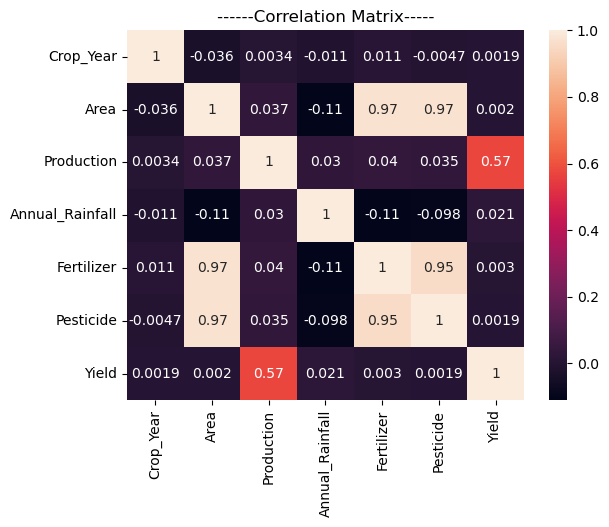

In [10]:
sns.heatmap(crops.corr(), annot =True)
plt.title('------Correlation Matrix-----')

# PREPROCESSING 

----SHOWING THAT LABEL ENCODING DOESNOT PERFORM WELL

In [ ]:

crops2=crops
# Preprocess data
# Separate features and target

X = crops2.drop('Yield', axis=1)
y = crops2['Yield']

#Split data into train and test sets
#training = 80%   testing = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x_train :",X_train.shape)
print("x_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (15751, 9)
x_test : (3938, 9)
y_train : (15751,)
y_test : (3938,)


In [17]:
#Using label encoding for categorical features
label_encoder = LabelEncoder()
crops2['Crop'] = label_encoder.fit_transform(crops2['Crop'])
crops2['Season'] = label_encoder.fit_transform(crops2['Season'])
crops2['State'] = label_encoder.fit_transform(crops2['State'])

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Machine': SVR()
}
   
# Dictionary to store results
results = {
    'Model': [],
    'Mean Absolute Error': [],
    'R2 Score': []
}

In [19]:
# Function to evaluate each model
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Storing the results for visualization
    results['Model'].append(model_name)
    results['Mean Absolute Error'].append(mae)
    results['R2 Score'].append(r2)


In [20]:
# Fit models and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, model_name)

# Convert results to DataFrame 
results_df = pd.DataFrame(results)
results_df

,Model,Mean Absolute Error,R2 Score
0,Linear Regression,145.416055,0.396129
1,Decision Tree,13.282317,0.878425
2,Random Forest,9.581507,0.916954
3,K-Nearest Neighbors,33.271067,0.811356
4,Support Vector Machine,82.582688,-0.005769


In [11]:
#USING ONE HOT ENCODING

In [12]:
# Separate features and target
X = crops.drop('Yield', axis=1)
y = crops['Yield']

# Split data into train and test sets
#training = 80%   testing = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x_train :",X_train.shape)
print("x_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (15751, 9)
x_test : (3938, 9)
y_train : (15751,)
y_test : (3938,)


In [13]:
# Seperating categorical and numerical columns
categorical_cols = ['Crop', 'Season', 'State']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing: One-hot encode for categorical variables and scale for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# MODELLING AND VISUALIZATION

In [14]:
# Algorithms to evaluate (all regression models)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

# Dictionary to store results
results = {
    'Model': [],
    'Mean Absolute Error': [],
    'R2 Score': []
}

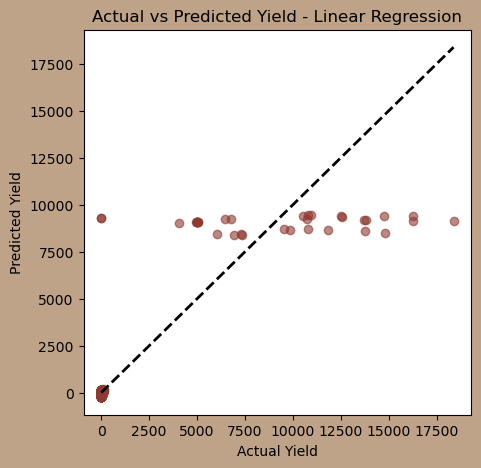

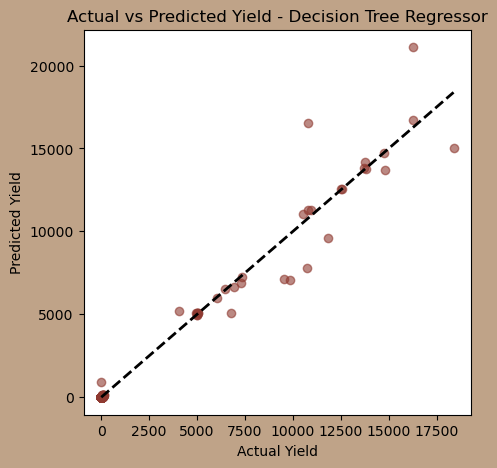

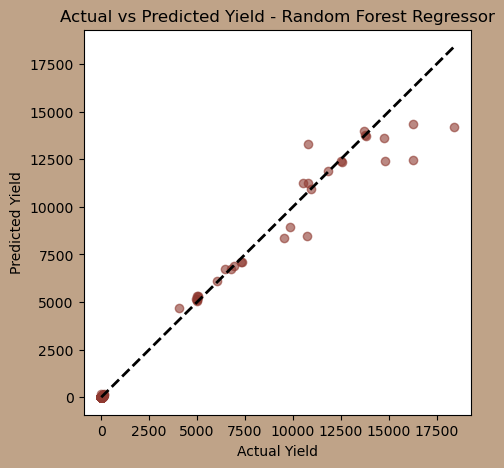

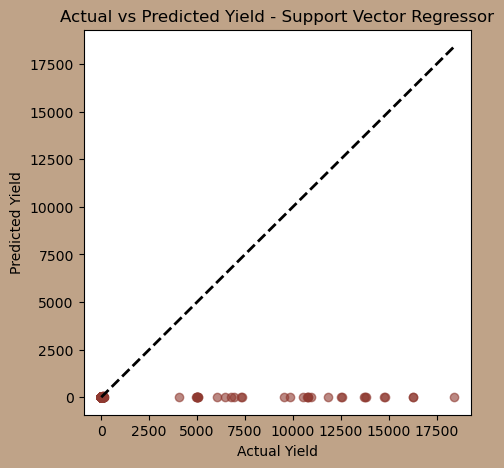

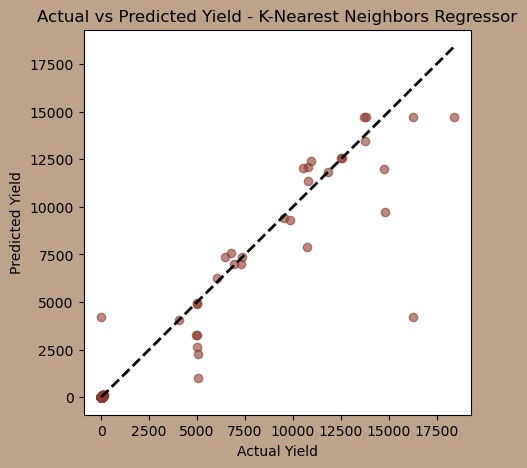

In [25]:

# Evaluating each model
for model_name, model in models.items():
    # Creating a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Fitting the model
    pipeline.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    
    # Computing metrics
    mae = mean_absolute_error(y_test, y_pred) #mean absolute error
    r2 = r2_score(y_test, y_pred)   #r2 score
    
    # Storing the results for visualization
    results['Model'].append(model_name)
    results['Mean Absolute Error'].append(mae)
    results['R2 Score'].append(r2)
    
    
    # Plot Actual vs Predicted values
    plt.figure(facecolor = '#bfa388',figsize=(5, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, color='#8f3a31')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel("Actual Yield")
    plt.ylabel("Predicted Yield")
    plt.title(f"Actual vs Predicted Yield - {model_name}")
    plt.show()


In [26]:
# Convert results to DataFrame 
results_df = pd.DataFrame(results)
results_df

,Model,Mean Absolute Error,R2 Score
0,Linear Regression,66.487494,0.798801
1,Decision Tree Regressor,8.943801,0.971119
2,Random Forest Regressor,6.860964,0.983523
3,Support Vector Regressor,81.084232,-0.004781
4,K-Nearest Neighbors Regressor,14.821484,0.925181


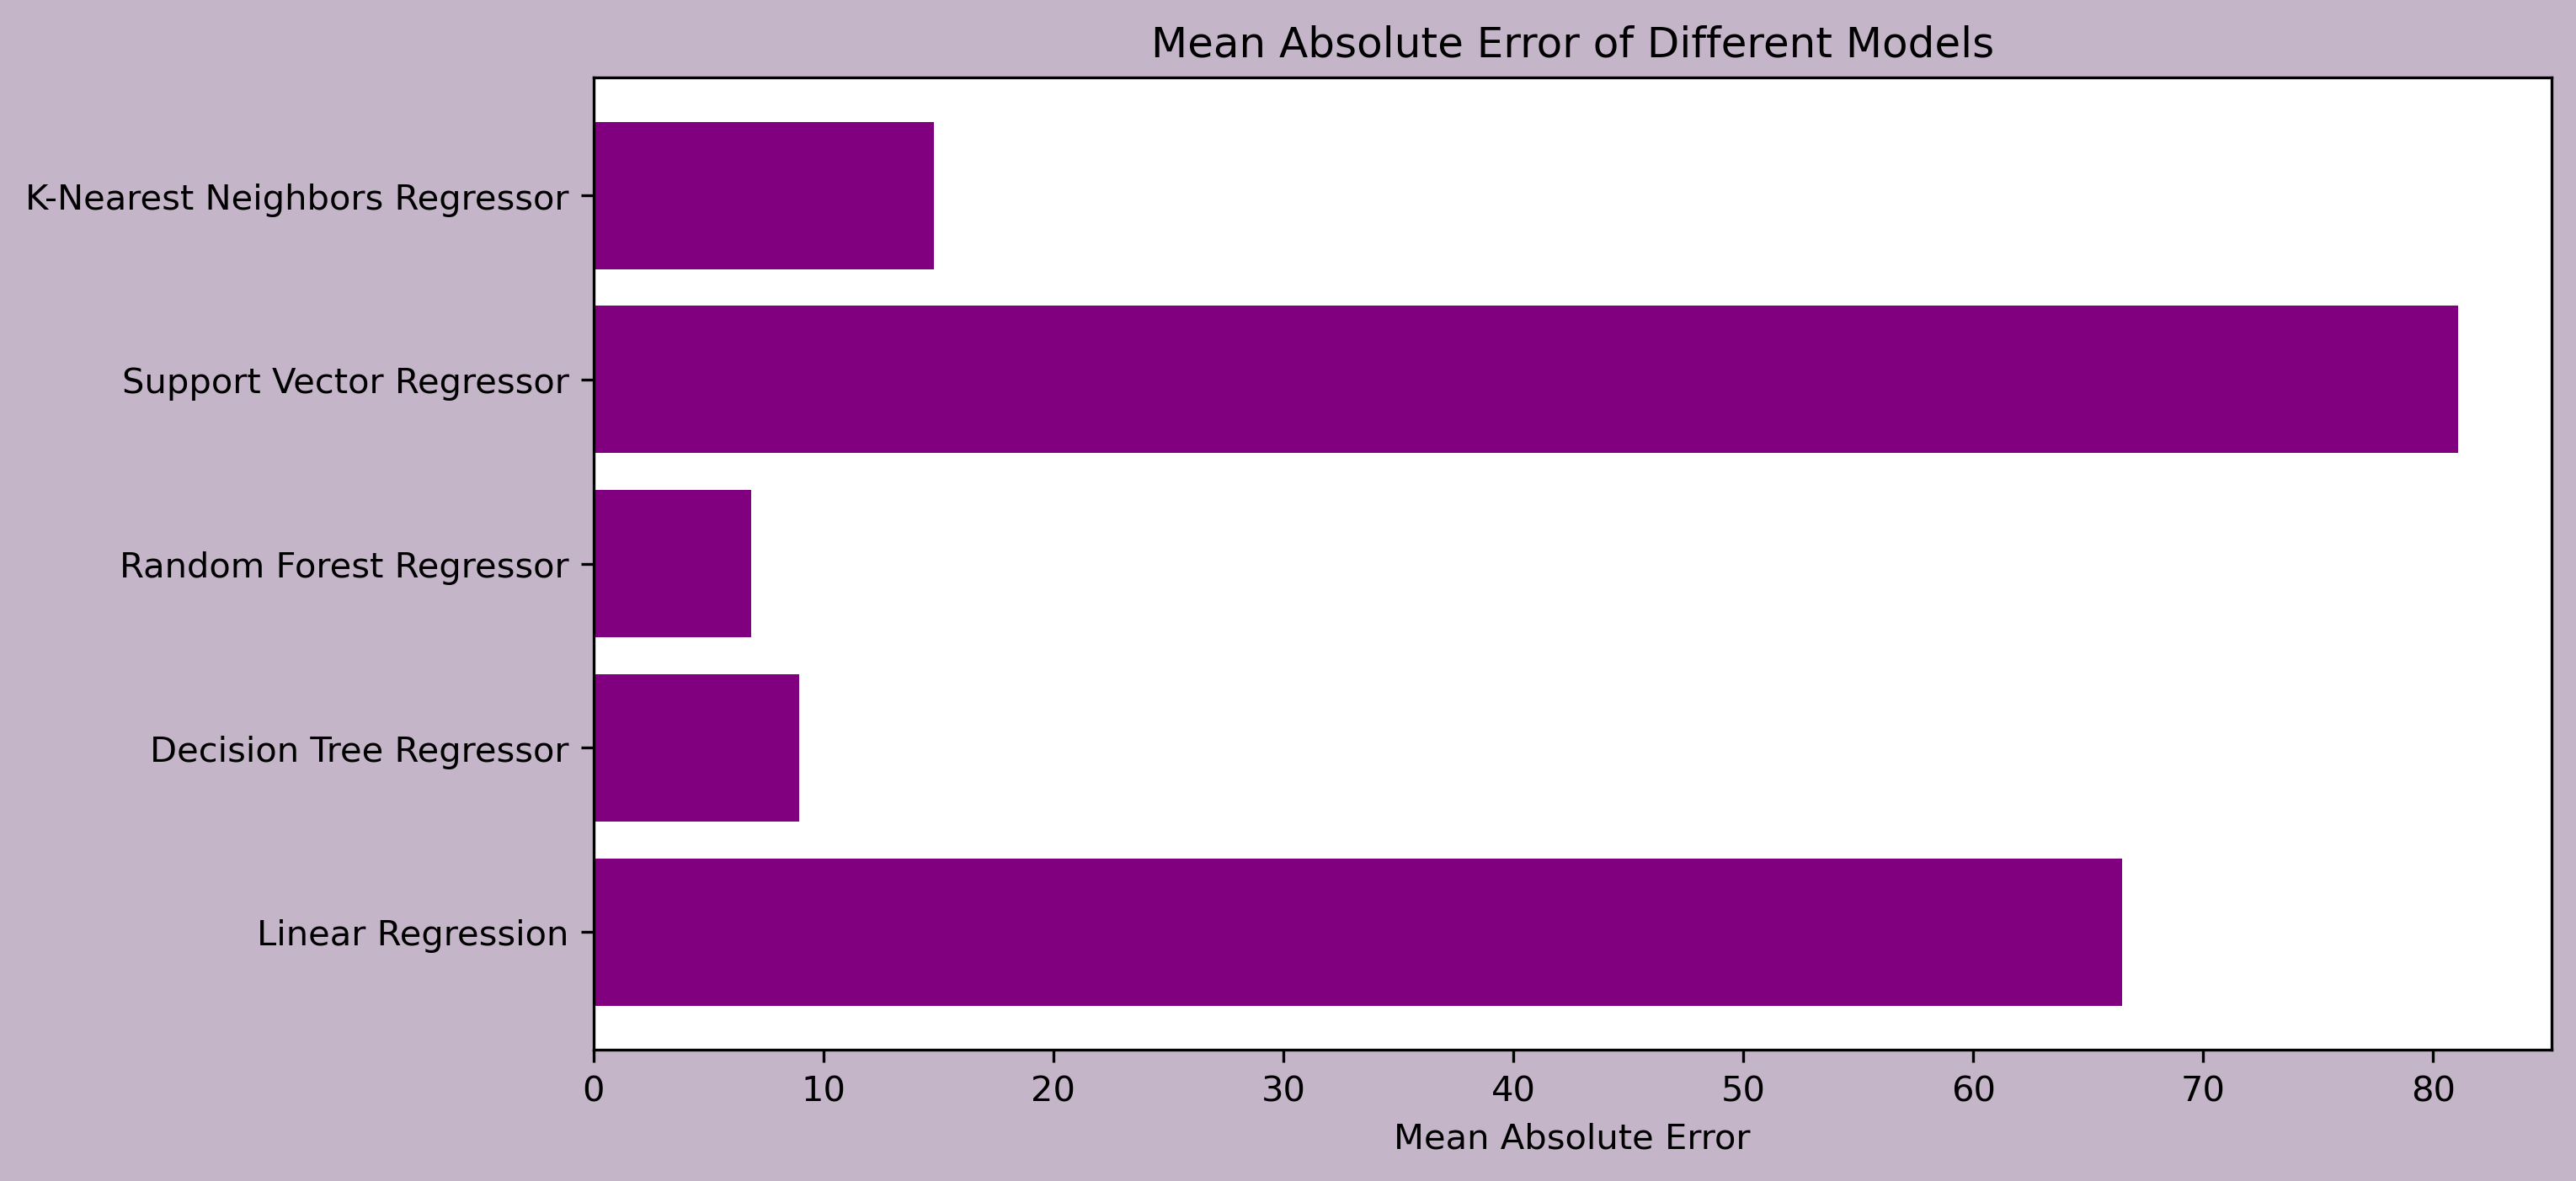

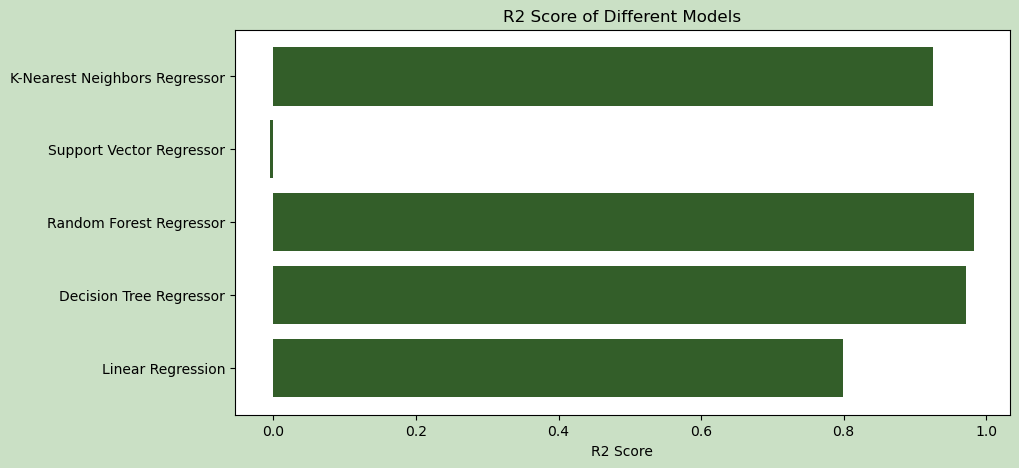

In [27]:

# Visualization of Mean Absolute Error of each model
plt.figure(facecolor="#c4b5c9",figsize=(10, 5),dpi=300)
plt.barh(results_df['Model'], results_df['Mean Absolute Error'], color='purple')
plt.xlabel('Mean Absolute Error')
plt.title('Mean Absolute Error of Different Models')
plt.show()

# Visualization of R2 Score of each model
plt.figure(facecolor="#cae0c5",figsize=(10, 5))
plt.barh(results_df['Model'], results_df['R2 Score'], color='#335e29')
plt.xlabel('R2 Score')
plt.title('R2 Score of Different Models')
plt.show()

# Random Forest Model Analysis

In [52]:
# Using Random Forest for separate analysis
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor())])
rf_pipeline.fit(X_train, y_train)
y_rf_pred = rf_pipeline.predict(X_test)

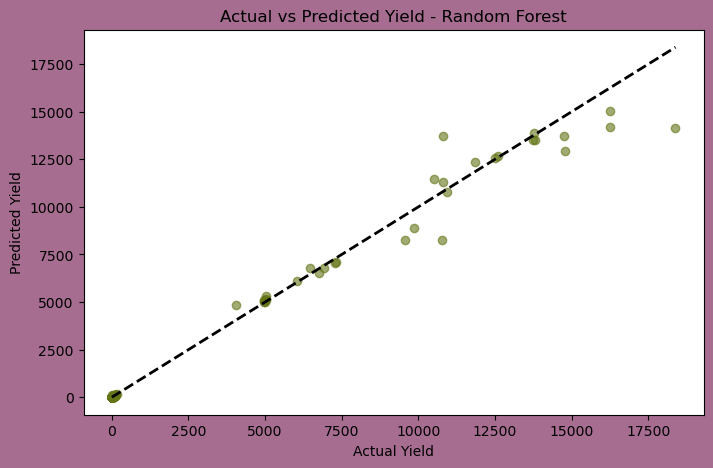

In [53]:
# Scatter plot: Actual vs Predicted Values
plt.figure(facecolor="#a66d90",figsize=(8, 5))
plt.scatter(y_test, y_rf_pred, alpha=0.6, color='#637517')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield - Random Forest")
plt.show()

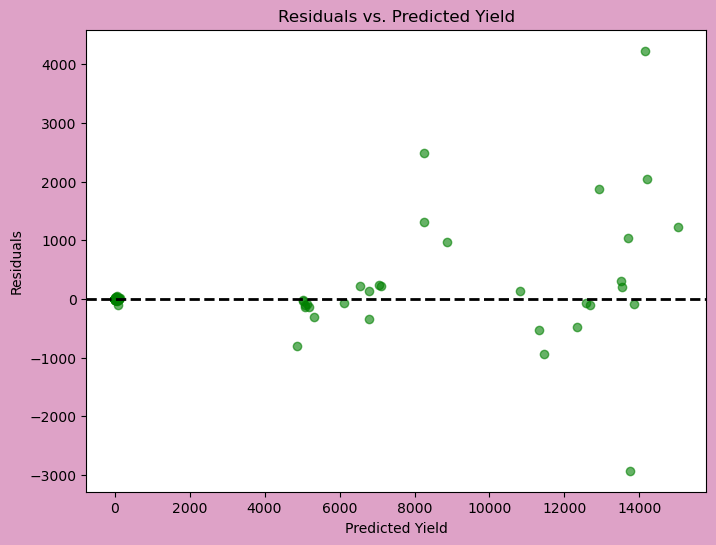

In [54]:
# 2. Residual Plot
residuals = y_test - y_rf_pred
plt.figure(facecolor="#dea2c7",figsize=(8, 6))
plt.scatter(y_rf_pred, residuals, alpha=0.6, color='g')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Yield')
plt.show()

# CROSS VALIDATION

In [15]:
#5 fold cross validation 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [16]:
# Performing 5-fold cross-validation for Random Forest
rf_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", RandomForestRegressor())])

# Compute cross-validation scores and accuracies for random forest
rf_mae_scores = cross_val_score(rf_pipeline, X, y, scoring="neg_mean_absolute_error", cv=kf)
rf_r2_scores = cross_val_score(rf_pipeline, X, y, scoring="r2", cv=kf)
rf_accuracies = cross_val_score(estimator = rf_pipeline, X = X_train, y=y_train, cv = 5)
print("Random Forest (5-Fold Cross-Validation):")
print(f"  Mean Absolute Error (MAE): {-np.mean(rf_mae_scores)}")
print(f"  R^2 Score: {np.mean(rf_r2_scores)}")
print("Accuracy : {:.2f}%".format (rf_accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(rf_accuracies.std()*100))

Random Forest (5-Fold Cross-Validation):
  Mean Absolute Error (MAE): 7.196707826069873
  R^2 Score: 0.98063415961219
Accuracy : 96.15%
Standard Deviation : 4.39%


In [51]:
# Performing 5-fold cross-validation for Decision tree
dt_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", DecisionTreeRegressor())])

# Compute cross-validation scores for decision tree
dt_mae_scores = cross_val_score(dt_pipeline, X, y, scoring="neg_mean_absolute_error", cv=kf)
dt_r2_scores = cross_val_score(dt_pipeline, X, y, scoring="r2", cv=kf)
dt_accuracies = cross_val_score(estimator = dt_pipeline, X = X_train, y=y_train, cv = 5)
print("Decision Tree (5-Fold Cross-Validation):")
print(f"  Mean Absolute Error (MAE): {-np.mean(dt_mae_scores)}")
print(f"  R^2 Score: {np.mean(dt_r2_scores)}")
print("Accuracy : {:.2f}%".format (dt_accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(dt_accuracies.std()*100))

Decision Tree (5-Fold Cross-Validation):
  Mean Absolute Error (MAE): 7.975172823642216
  R^2 Score: 0.971796065104545
Accuracy : 93.95%
Standard Deviation : 6.15%
